In [156]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import rcParams
%matplotlib inline

In [157]:
cwd = pathlib.Path().cwd()
data_path = cwd/"dataset"/"final_train.csv"
pd.set_option("display.max_rows", None, "display.max_columns", None)
data = pd.read_csv(data_path, index_col=0)

In [158]:
data.shape[0] - (data.isna().sum(axis=1)<20).sum()
data = data[data.isna().sum(axis=1)<20]

In [159]:
def data_to_train_valid(data):
    y = data.loc[:, "Activity"].copy()
    X = data.drop(["Activity"], axis=1)
    #simple split
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_valid, y_train, y_valid

In [160]:
def encode_y(y_train, y_valid):
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_valid = label_encoder.transform(y_valid)
    return y_train, y_valid, label_encoder

In [161]:
## Split data, encode y labels

X_train, X_valid, y_train, y_valid = data_to_train_valid(data)

In [162]:
y_train, y_valid, label_encoder = encode_y(y_train, y_valid)

In [163]:
numerical_columns = list(X_train.columns.values)

numerical_transformer = SimpleImputer(strategy='median')
scaler = StandardScaler()
preproc = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns)
       
    ])

# SVC

In [164]:
svc = SVC()
svc_pipe = Pipeline(steps=[('preproc', preproc),
                            ('scaler', scaler),
                            ('model', svc)]
                     )

# Grid search

In [165]:
params_grid = [{'model__kernel': ['rbf'], 'model__gamma': [1e-3, 1e-4],
                     'model__C': [1, 10, 100, 1000]},
                    {'model__kernel': ['linear'], 'model__C': [1, 10, 100, 1000]}]

In [166]:
svc_grid = GridSearchCV(svc_pipe, params_grid, cv=5, verbose=2, n_jobs=-1)

In [167]:
svc_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preproc', 'scaler', 'model', 'preproc__n_jobs', 'preproc__remainder', 'preproc__sparse_threshold', 'preproc__transformer_weights', 'preproc__transformers', 'preproc__verbose', 'preproc__num', 'preproc__num__add_indicator', 'preproc__num__copy', 'preproc__num__fill_value', 'preproc__num__missing_values', 'preproc__num__strategy', 'preproc__num__verbose', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'model__C', 'model__break_ties', 'model__cache_size', 'model__class_weight', 'model__coef0', 'model__decision_function_shape', 'model__degree', 'model__gamma', 'model__kernel', 'model__max_iter', 'model__probability', 'model__random_state', 'model__shrinking', 'model__tol', 'model__verbose'])

In [168]:
svc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['angle(X,gravityMean)',
                                                                          'angle(Y,gravityMean)',
                                                                          'angle(Z,gravityMean)',
                                                                          'angle(tBodyAccJerkMean),gravityMean)',
                                                                          'angle(tBodyAccMean,gravity)',
                                                                          'angle(tBodyGyroJerkMean,gravityMean)',
                                                                          'angle(tBodyGyroMean,gravityMean)',
      

In [169]:
svc_grid.best_score_

0.9883967590137412

In [170]:
svc_grid.best_params_

{'model__C': 100, 'model__gamma': 0.001, 'model__kernel': 'rbf'}

In [171]:
best_svc = svc_grid.best_estimator_

In [172]:
y_pred_svc = best_svc.predict(X_valid)

In [173]:
accuracy_score(y_pred_svc, y_valid)

0.9907181240840254

In [174]:
print(label_encoder.classes_)
print(label_encoder.transform(label_encoder.classes_))

['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']
[0 1 2 3 4 5]


rows reality, columns predictions, for example (indexing from 0)row=1, col=2 : 21 is how many times sitting was predicted as standing

In [175]:
confusion_matrix(y_pred_svc, y_valid)

array([[399,   1,   0,   0,   0,   0],
       [  0, 399,   8,   0,   0,   0],
       [  0,   9, 360,   0,   0,   0],
       [  0,   0,   0, 317,   0,   1],
       [  0,   0,   0,   0, 244,   0],
       [  0,   0,   0,   0,   0, 309]])

svc deals greatly with all walkings 

# Logistic Regression

In [176]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg_pipe = Pipeline(steps=[('preproc', preproc),
                            ('scaler', scaler),
                            ('model', log_reg)]
                     )

In [177]:
log_reg_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preproc', 'scaler', 'model', 'preproc__n_jobs', 'preproc__remainder', 'preproc__sparse_threshold', 'preproc__transformer_weights', 'preproc__transformers', 'preproc__verbose', 'preproc__num', 'preproc__num__add_indicator', 'preproc__num__copy', 'preproc__num__fill_value', 'preproc__num__missing_values', 'preproc__num__strategy', 'preproc__num__verbose', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'model__C', 'model__class_weight', 'model__dual', 'model__fit_intercept', 'model__intercept_scaling', 'model__l1_ratio', 'model__max_iter', 'model__multi_class', 'model__n_jobs', 'model__penalty', 'model__random_state', 'model__solver', 'model__tol', 'model__verbose', 'model__warm_start'])

In [178]:
params_grid = {'model__C':[0.01, 0.03, 0.1, 0.3, 1, 10, 30], 'model__penalty':['l1', 'l2']}

In [179]:
log_reg_grid = GridSearchCV(log_reg_pipe, params_grid, cv=5, verbose=2, n_jobs=-1)

In [180]:
log_reg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/home/adam/Documents/ML/my_env/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.97618175        nan 0.97972414        nan 0.98326669
        nan 0.98314474        nan 0.98399951        nan 0.98228892
        nan 0.98094567]
  warnings.warn(
/home/adam/Documents/ML/my_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['angle(X,gravityMean)',
                                                                          'angle(Y,gravityMean)',
                                                                          'angle(Z,gravityMean)',
                                                                          'angle(tBodyAccJerkMean),gravityMean)',
                                                                          'angle(tBodyAccMean,gravity)',
                                                                          'angle(tBodyGyroJerkMean,gravityMean)',
                                                                          'angle(tBodyGyroMean,gravityMean)',
      

In [181]:
log_reg_best = log_reg_grid.best_estimator_

In [182]:
log_reg_grid.best_params_

{'model__C': 1, 'model__penalty': 'l2'}

In [183]:
log_reg_grid.best_score_

0.9839995136879682

In [184]:
y_pred_log_reg = log_reg_grid.predict(X_valid)
accuracy_score(y_pred_log_reg, y_valid)

0.9853444064484611

In [185]:
print(label_encoder.classes_)
print(label_encoder.transform(label_encoder.classes_))

['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']
[0 1 2 3 4 5]


In [186]:
confusion_matrix(y_pred_log_reg, y_valid)

array([[399,   3,   0,   0,   0,   0],
       [  0, 394,  12,   0,   0,   0],
       [  0,  11, 356,   0,   0,   0],
       [  0,   0,   0, 317,   0,   2],
       [  0,   0,   0,   0, 243,   0],
       [  0,   1,   0,   0,   1, 308]])

log_reg deals greatly with all walkings 

# Random forest classifier

In [187]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy')
rfc_pipe = Pipeline(steps=[('preproc', preproc),
                          ('scaler', scaler),
                          ('model', rfc)])

In [188]:
rfc_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preproc', 'scaler', 'model', 'preproc__n_jobs', 'preproc__remainder', 'preproc__sparse_threshold', 'preproc__transformer_weights', 'preproc__transformers', 'preproc__verbose', 'preproc__num', 'preproc__num__add_indicator', 'preproc__num__copy', 'preproc__num__fill_value', 'preproc__num__missing_values', 'preproc__num__strategy', 'preproc__num__verbose', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'model__bootstrap', 'model__ccp_alpha', 'model__class_weight', 'model__criterion', 'model__max_depth', 'model__max_features', 'model__max_leaf_nodes', 'model__max_samples', 'model__min_impurity_decrease', 'model__min_impurity_split', 'model__min_samples_leaf', 'model__min_samples_split', 'model__min_weight_fraction_leaf', 'model__n_estimators', 'model__n_jobs', 'model__oob_score', 'model__random_state', 'model__verbose', 'model__warm_start'])

# Neural Networks

## Deep neural network with dropout layers

In [189]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Input
from tensorflow import keras

In [226]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1])))
model.add(Dense(64, activation='elu', kernel_initializer="he_normal"))
model.add(Dropout(0.5))
model.add(Dense(64, activation='elu', kernel_initializer="he_normal"))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [227]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [228]:
history = model.fit(X_train, y_train, epochs=32, validation_data=(X_valid, y_valid))

Epoch 1/32
256/256 [==============================] - 1s 3ms/step - loss: 3.2320 - accuracy: 0.3210 - val_loss: 0.6572 - val_accuracy: 0.6903
Epoch 2/32
256/256 [==============================] - 1s 2ms/step - loss: 1.1540 - accuracy: 0.5558 - val_loss: 0.4911 - val_accuracy: 0.7684
Epoch 3/32
256/256 [==============================] - 1s 2ms/step - loss: 0.7872 - accuracy: 0.6690 - val_loss: 0.4956 - val_accuracy: 0.7704
Epoch 4/32
256/256 [==============================] - 1s 2ms/step - loss: 0.6301 - accuracy: 0.7298 - val_loss: 0.3685 - val_accuracy: 0.8505
Epoch 5/32
256/256 [==============================] - 1s 2ms/step - loss: 0.5295 - accuracy: 0.7701 - val_loss: 0.3167 - val_accuracy: 0.8881
Epoch 6/32
256/256 [==============================] - 1s 2ms/step - loss: 0.4936 - accuracy: 0.7964 - val_loss: 0.3248 - val_accuracy: 0.8705
Epoch 7/32
256/256 [==============================] - 1s 2ms/step - loss: 0.4622 - accuracy: 0.8045 - val_loss: 0.2601 - val_accuracy: 0.9047
Epoch 

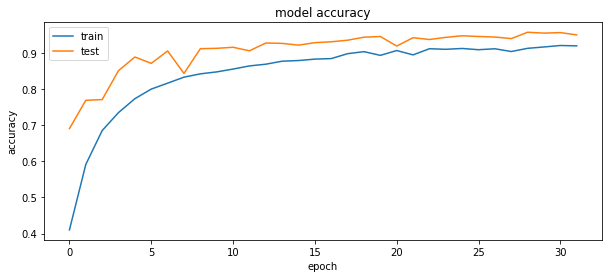

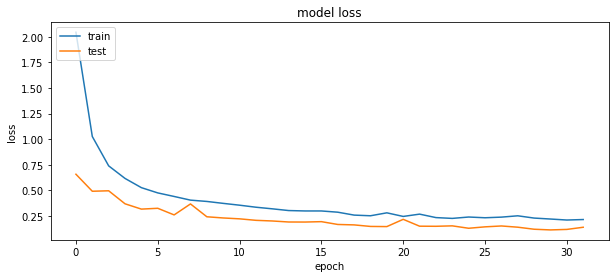

In [229]:
rcParams['figure.figsize'] = 10, 4
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [230]:
nn_y_pred = model.predict(X_valid)

In [231]:
nn_y_pred[:10].argmax(axis=1)

array([3, 5, 4, 3, 4, 1, 3, 0, 1, 2])

In [232]:
accuracy_score(nn_y_pred.argmax(axis=1), y_valid)

0.9491939423546654

In [233]:
confusion_matrix(nn_y_pred.argmax(axis=1), y_valid)

array([[399,   8,   0,   0,   0,   0],
       [  0, 346,  17,   0,   0,   0],
       [  0,  53, 351,   0,   0,   0],
       [  0,   0,   0, 317,   4,  18],
       [  0,   1,   0,   0, 239,   1],
       [  0,   1,   0,   0,   1, 291]])